The Cityscapes Dataset focuses on semantic understanding of urban street scenes contain 30 classes


---


| Group	| Classes |
|-------|---------|
| flat	| road · sidewalk · parking+ · rail track+ |
| human	| person* · rider* |
| vehicle	| car* · truck* · bus* · on rails* · motorcycle* · bicycle* · caravan*+ · trailer*+ |
| construction	| building · wall · fence · guard rail+ · bridge+ · tunnel+ |
| object	| pole · pole group+ · traffic sign · traffic light |
| nature	| vegetation · terrain |
| sky	| sky |
| void	| ground+ · dynamic+ · static+ |



---


(*) Single instance annotations are available. However, if the boundary between such instances cannot be clearly seen, the whole crowd/group is labeled together and annotated as group, e.g. car group.


---


(+) This label is not included in any evaluation and treated as void (or in the case of license plate as the vehicle mounted on).

# Import Libraries

In [ ]:
!pip install keras-segmentation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 21.2 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29057 sha256=ce0d694d82f27d4f0e2731d2520860ca5cb1a05f524d36e3a86fbe9eba918ea6
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0


In [ ]:
# import time
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import Image
from PIL import Image

# Drive Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Preparation

In [ ]:
import shutil

In [ ]:
drive_dataset_path = '/content/drive/MyDrive/cv_bootcamp_indonesiaai/project_3/dataset'
drive_model_path = '/content/drive/MyDrive/cv_bootcamp_indonesiaai/project_3/models'

In [ ]:
destination_folder = '/content/cityscapes'
shutil.copytree(drive_dataset_path, destination_folder)

'/content/cityscapes'

In [ ]:
model_dest_folder = '/content/models'
shutil.copytree(drive_model_path, model_dest_folder)

'/content/models'

In [ ]:
# drive.flush_and_unmount()

In [ ]:
import os

In [ ]:
# train_img_path = os.path.join(drive_dataset_path, 'images_prepped_train-20230811T065243Z-001', 'images_prepped_train')
# train_annot_path = os.path.join(drive_dataset_path, 'annotations_prepped_train-20230811T065240Z-001', 'annotations_prepped_train')

# test_img_path = os.path.join(drive_dataset_path, 'images_prepped_test-20230811T065241Z-001', 'images_prepped_test')
# test_annot_path = os.path.join(drive_dataset_path, 'annotations_prepped_test-20230811T065240Z-001', 'annotations_prepped_test')

train_img_path = os.path.join(destination_folder, 'images_train', 'images_prepped_train')
train_annot_path = os.path.join(destination_folder, 'annotations_train', 'annotations_prepped_train')

test_img_path = os.path.join(destination_folder, 'images_test', 'images_prepped_test')
test_annot_path = os.path.join(destination_folder, 'annotations_test', 'annotations_prepped_test')

In [ ]:
print(f'total train images: {len(os.listdir(train_img_path))}')
print(f'total train annots: {len(os.listdir(train_annot_path))}')
print(f'total test images: {len(os.listdir(test_img_path))}')
print(f'total test annots: {len(os.listdir(test_annot_path))}')

total train images: 367
total train annots: 367
total test images: 101
total test annots: 101


In [ ]:
# def get_classes_annotations(annotation_folder):
#     # Initialize a dictionary to store the counts for each class
#     class_counts = {}

#     # Iterate through each file in the folder
#     for filename in os.listdir(annotation_folder):
#         if filename.endswith('.png'):  # Assuming images are in PNG format, adjust as needed
#             # Load the annotation image
#             annotation_path = os.path.join(annotation_folder, filename)
#             annotation_image = Image.open(annotation_path)

#             # Convert the image to a NumPy array
#             annotation_array = np.array(annotation_image)

#             # Count occurrences of each unique class value
#             unique_classes, counts = np.unique(annotation_array, return_counts=True)

#             # Update the class_counts dictionary
#             for class_value, count in zip(unique_classes, counts):
#                 if class_value not in class_counts:
#                     class_counts[class_value] = 0
#                 class_counts[class_value] += count

#     # Print the class counts
#     for class_value, count in class_counts.items():
#         print(f"Class {class_value}: {count} pixels")

#     # Print the number of unique classes and the unique class values
#     number_of_classes = len(class_counts)
#     unique_classes_values = sorted(list(class_counts.keys()))

#     print("\nNumber of Unique Classes:", number_of_classes)
#     print("Unique Class Values:", unique_classes_values)

In [ ]:
# def get_classes_annotations(annotation_folder):
#     # Initialize an empty set to accumulate unique classes
#     unique_classes_set = set()

#     # Iterate through each file in the folder
#     for filename in os.listdir(annotation_folder):
#         if filename.endswith('.png'):  # Assuming images are in PNG format, adjust as needed
#             # Load the annotation image
#             annotation_path = os.path.join(annotation_folder, filename)
#             annotation_image = Image.open(annotation_path)

#             # Convert the image to a NumPy array
#             annotation_array = np.array(annotation_image)

#             # Add unique classes to the set
#             unique_classes_set.update(np.unique(annotation_array))

#     # Print the number of unique classes and the unique class values
#     number_of_classes = len(unique_classes_set)
#     unique_classes_values = sorted(list(unique_classes_set))

#     print("Number of Unique Classes:", number_of_classes)
#     print("Unique Class Values:", unique_classes_values)

In [ ]:
# def get_classes_and_weights(annotation_folder):
#     # Initialize a dictionary to store the counts for each class
#     class_counts = {}

#     # Iterate through each file in the folder
#     for filename in os.listdir(annotation_folder):
#         if filename.endswith('.png'):  # Assuming images are in PNG format, adjust as needed
#             # Load the annotation image
#             annotation_path = os.path.join(annotation_folder, filename)
#             annotation_image = Image.open(annotation_path)

#             # Convert the image to a NumPy array
#             annotation_array = np.array(annotation_image)

#             # Count occurrences of each unique class value
#             unique_classes, counts = np.unique(annotation_array, return_counts=True)

#             # Update the class_counts dictionary
#             for class_value, count in zip(unique_classes, counts):
#                 if class_value not in class_counts:
#                     class_counts[class_value] = 0
#                 class_counts[class_value] += count

#     # Calculate class frequencies
#     total_pixels = sum(class_counts.values())
#     class_frequencies = {class_value: count / total_pixels for class_value, count in class_counts.items()}

#     # Calculate inverse class frequencies to use as weights
#     class_weights = {class_value: 1.0 / freq for class_value, freq in class_frequencies.items()}

#     # Normalize weights to sum to the number of classes
#     total_weights = sum(class_weights.values())
#     class_weights = {class_value: weight / total_weights for class_value, weight in class_weights.items()}

#     # Print the class counts
#     for class_value, count in class_counts.items():
#         print(f"Class {class_value}: {count} pixels")

#     # Print the number of unique classes and the unique class values
#     number_of_classes = len(class_counts)
#     unique_classes_values = sorted(list(class_counts.keys()))

#     print("\nNumber of Unique Classes:", number_of_classes)
#     print("Unique Class Values:", unique_classes_values)

#     return class_weights

In [ ]:
# def get_classes_and_weights(annotation_folder):
#     # Initialize a dictionary to store the counts for each class
#     class_counts = {}

#     # Initialize a dictionary to store the total pixel count for each class across all images
#     class_total_pixels = {}

#     # Initialize a dictionary to store the number of images containing each class
#     class_image_count = {}

#     # Iterate through each file in the folder
#     for filename in os.listdir(annotation_folder):
#         if filename.endswith('.png'):  # Assuming images are in PNG format, adjust as needed
#             # Load the annotation image
#             annotation_path = os.path.join(annotation_folder, filename)
#             annotation_image = Image.open(annotation_path)

#             # Convert the image to a NumPy array
#             annotation_array = np.array(annotation_image)

#             # Identify unique classes in the image
#             unique_classes = np.unique(annotation_array)

#             # Update class counts, total pixel counts, and image counts
#             for class_value in unique_classes:
#                 if class_value not in class_counts:
#                     class_counts[class_value] = 0
#                     class_total_pixels[class_value] = 0
#                     class_image_count[class_value] = 0

#                 class_counts[class_value] += 1
#                 class_total_pixels[class_value] += np.sum(annotation_array == class_value)
#                 class_image_count[class_value] += 1

#     # Calculate class frequencies based on average pixels per image
#     class_frequencies = {class_value: total_pixels / image_count for class_value, total_pixels, image_count in
#                          zip(class_total_pixels.keys(), class_total_pixels.values(), class_image_count.values())}

#     # Calculate inverse class frequencies to use as weights
#     class_weights = {class_value: 1.0 / freq for class_value, freq in class_frequencies.items()}

#     # Normalize weights to sum to the number of classes
#     total_weights = sum(class_weights.values())
#     class_weights = {class_value: weight / total_weights for class_value, weight in class_weights.items()}

#     # Print the class counts
#     for class_value, count in class_counts.items():
#         print(f"Class {class_value}: {count} images")

#     # Print the number of unique classes and the unique class values
#     number_of_classes = len(class_counts)
#     unique_classes_values = sorted(list(class_counts.keys()))

#     print("\nNumber of Unique Classes:", number_of_classes)
#     print("Unique Class Values:", unique_classes_values)

#     return class_weights

In [ ]:
def get_classes_and_weights(annotation_folder, num_classes=12):
    # Initialize a dictionary to store the counts for each class
    class_counts = {}

    # Initialize a dictionary to store the total pixel count for each class across all images
    class_total_pixels = {}

    # Initialize a dictionary to store the number of images containing each class
    class_image_count = {}

    # Initialize a dictionary to store filenames for images that don't contain all classes
    incomplete_images = {}

    # Iterate through each file in the folder
    for filename in os.listdir(annotation_folder):
        if filename.endswith('.png'):  # Assuming images are in PNG format, adjust as needed
            # Load the annotation image
            annotation_path = os.path.join(annotation_folder, filename)
            annotation_image = Image.open(annotation_path)

            # Convert the image to a NumPy array
            annotation_array = np.array(annotation_image)

            # Identify unique classes in the image
            unique_classes = np.unique(annotation_array)

            # Update class counts, total pixel counts, and image counts
            for class_value in unique_classes:
                if class_value not in class_counts:
                    class_counts[class_value] = 0
                    class_total_pixels[class_value] = 0
                    class_image_count[class_value] = 0

                class_counts[class_value] += 1
                class_total_pixels[class_value] += np.sum(annotation_array == class_value)
                class_image_count[class_value] += 1

            # Check if the image contains all classes
            if len(unique_classes) < num_classes:
                incomplete_images[filename] = unique_classes

    # Calculate class frequencies based on average pixels per image
    class_frequencies = {class_value: total_pixels / image_count for class_value, total_pixels, image_count in
                         zip(class_total_pixels.keys(), class_total_pixels.values(), class_image_count.values())}

    # Calculate inverse class frequencies to use as weights
    class_weights = {class_value: 1.0 / freq for class_value, freq in class_frequencies.items()}

    # Normalize weights to sum to the number of classes
    total_weights = sum(class_weights.values())
    class_weights = {class_value: weight / total_weights for class_value, weight in class_weights.items()}

    # Print the class counts
    for class_value, count in class_counts.items():
        print(f"Class {class_value}: {count} images")

    # Print the number of unique classes and the unique class values
    number_of_classes = len(class_counts)
    unique_classes_values = sorted(list(class_counts.keys()))

    print("\nNumber of Unique Classes:", number_of_classes)
    print("Unique Class Values:", unique_classes_values)

    # Print filenames of images that don't contain all classes
    print("\nIncomplete Images:")
    for filename, missing_classes in incomplete_images.items():
        print(f"{filename}: Missing Classes {missing_classes}")

    return class_weights, incomplete_images

The total number of train images bigger than total number of train annotations which means there are some train images that doesn't have annotations

In [ ]:
train_class_weights, train_incomplete_images = get_classes_and_weights(train_annot_path, 12)
train_class_weights

Class 0: 366 images
Class 1: 365 images
Class 2: 366 images
Class 3: 367 images
Class 4: 349 images
Class 5: 319 images
Class 6: 351 images
Class 8: 360 images
Class 9: 317 images
Class 11: 367 images
Class 10: 201 images
Class 7: 173 images

Number of Unique Classes: 12
Unique Class Values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Incomplete Images:
0016E5_04950.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 11]
0001TP_008490.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 10 11]
0001TP_006990.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 10 11]
0016E5_04980.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 11]
0001TP_007890.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 10 11]
0016E5_06240.png: Missing Classes [ 0  1  2  3  4  6  8  9 11]
0001TP_008340.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 10 11]
0001TP_007440.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 11]
0006R0_f02520.png: Missing Classes [ 0  1  2  3  4  5  6  8  9 11]
0006R0_f03180.png: Missing Classes [ 0 

{0: 0.009348638795670355,
 1: 0.0067522664115487714,
 2: 0.16021414973202336,
 3: 0.004987936225311062,
 4: 0.033471966794922696,
 5: 0.014115119083766888,
 6: 0.12875602055304153,
 8: 0.026407359138436615,
 9: 0.21337455985647272,
 11: 0.039992970051147526,
 10: 0.2965192245381285,
 7: 0.0660597888195301}

In [ ]:
len(train_incomplete_images)

276

In [ ]:
test_class_weights, test_incomplete_images = get_classes_and_weights(test_annot_path, 12)
test_class_weights

Class 0: 101 images
Class 1: 101 images
Class 2: 101 images
Class 3: 101 images
Class 4: 101 images
Class 5: 101 images
Class 6: 101 images
Class 7: 101 images
Class 8: 101 images
Class 9: 101 images
Class 10: 101 images
Class 11: 101 images

Number of Unique Classes: 12
Unique Class Values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Incomplete Images:


{0: 0.016207196679627528,
 1: 0.005728699885245133,
 2: 0.2635333388767911,
 3: 0.0051369218776518046,
 4: 0.01705783031916854,
 5: 0.009104395754667031,
 6: 0.16669087838756416,
 7: 0.048320765652125834,
 8: 0.08518676520440358,
 9: 0.2286403744001642,
 10: 0.06707260883704566,
 11: 0.08732022412554552}

In [ ]:
len(test_incomplete_images)

0

## Data Cleaning

Let's take a look of train images with no annotations

In [ ]:
def get_image_no_annot(imgs_path, annots_path):
    paths = []
    for img_path in os.listdir(imgs_path):
        if img_path not in os.listdir(annots_path):
            paths.append(img_path)
    return paths

In [ ]:
no_annot_imgs = get_image_no_annot(train_img_path, train_annot_path)

In [ ]:
print(no_annot_imgs)

[]


Seems the train images contains duplicate data

### Remove Duplicates

Remove duplicate images with no annotations

In [ ]:
def remove_image_no_annot(imgs_path, no_annot_imgs):
    for img in no_annot_imgs:
        file_path = os.path.join(imgs_path, img)
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"File at {file_path} has been removed.")
        else:
            print(f"File at {file_path} does not exist.")

In [ ]:
remove_image_no_annot(train_img_path, no_annot_imgs)

In [ ]:
print(f'total train images: {len(os.listdir(train_img_path))}')
print(f'total train annots: {len(os.listdir(train_annot_path))}')
print(f'total test images: {len(os.listdir(test_img_path))}')
print(f'total test annots: {len(os.listdir(test_annot_path))}')

total train images: 367
total train annots: 367
total test images: 101
total test annots: 101


### Remove Incomplete Label Images

In [ ]:
# def remove_image_by_filename(imgs, img_paths, annot_paths):
#     for img in imgs:
#         img_path = os.path.join(img_paths, img)
#         annot_path = os.path.join(annot_paths, img)
#         if os.path.exists(img_path) and os.path.exists(annot_path):
#             os.remove(img_path)
#             print(f"File at {img_path} has been removed.")
#             os.remove(annot_path)
#             print(f"File at {annot_path} has been removed.")
#         else:
#             print(f"File at {img_path} does not exist.")
#             print(f"File at {annot_path} does not exist.")

In [ ]:
# remove_image_by_filename(train_incomplete_images.keys(), train_img_path, train_annot_path)

In [ ]:
# print(f'total train images: {len(os.listdir(train_img_path))}')
# print(f'total train annots: {len(os.listdir(train_annot_path))}')
# print(f'total test images: {len(os.listdir(test_img_path))}')
# print(f'total test annots: {len(os.listdir(test_annot_path))}')

In [ ]:
# train_class_weights, train_incomplete_images = get_classes_and_weights(train_annot_path, 12)
# train_class_weights

In [ ]:
from keras_segmentation.data_utils.data_loader import image_segmentation_generator, verify_segmentation_dataset

In [ ]:
verify_segmentation_dataset(train_img_path, train_annot_path, 12)

100%|██████████| 367/367 [00:02<00:00, 125.56it/s]

Dataset verified! 


True

In [ ]:
verify_segmentation_dataset(test_img_path, test_annot_path, 12)

100%|██████████| 101/101 [00:01<00:00, 91.81it/s]

Dataset verified! 


True

## Preprocessing Data

In [ ]:
import cv2

In [ ]:
# def patch_image(image, height_patch, width_patch):
#     image_height, image_width, _ = image.shape
#     num_patches_height = image_height // height_patch
#     num_patches_width = image_width // width_patch

#     patched_image = np.empty((num_patches_height, num_patches_width, height_patch, width_patch, 3))

#     for i in range(num_patches_height):
#         for j in range(num_patches_width):
#             patch = image[i * height_patch: (i + 1) * height_patch, j * width_patch: (j + 1) * width_patch, :]
#             patched_image[i, j] = patch

#     return patched_image

In [ ]:
# def patch_to_grayscale(patched_image):
#     num_patches_height, num_patches_width, height_patch, width_patch, _ = patched_image.shape

#     patched_grayscale = np.zeros((num_patches_height, num_patches_width, height_patch, width_patch), dtype=np.uint8)

#     for i in range(num_patches_height):
#         for j in range(num_patches_width):
#             patch = patched_image[i,j]
#             patch_grayscale = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
#             patched_grayscale[i,j] = patch_grayscale

#     return patched_grayscale

In [ ]:
# def combine_patches(patched_image):
#     num_patches_height, num_patches_width, height_patch, width_patch, channels = patched_image.shape

#     if channels == 1:
#         combined_image = np.empty((num_patches_height * height_patch, num_patches_width * width_patch))
#     else:
#         combined_image = np.empty((num_patches_height * height_patch, num_patches_width * width_patch, channels))

#     for i in range(num_patches_height):
#         for j in range(num_patches_width):
#             patch = patched_image[i, j]
#             combined_image[i * height_patch: (i + 1) * height_patch, j * width_patch: (j + 1) * width_patch] = patch

#     return combined_image

In [ ]:
# def preprocess_image(x):
#     return patch_to_grayscale(patch_image(x, 176, 240))

In [ ]:
train_gen = image_segmentation_generator(
        train_img_path, train_annot_path,  2,  12,
        480, 352, 240, 176)

In [ ]:
test_gen = image_segmentation_generator(
        test_img_path, test_annot_path,  2,  12,
        480, 352, 240, 176)

# Model

## Train

In [ ]:
import keras
import keras.backend as K
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras_segmentation.models.unet import vgg_unet, resnet50_unet

In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
sm_dice_loss = sm.losses.DiceLoss()

In [ ]:
def dice_loss_multiclass(targets, inputs, smooth=1e-6):
    # Flatten label and prediction tensors
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)

    # Calculate Dice coefficient for each class
    intersection = K.sum(targets * inputs)
    dice_per_class = (2 * intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)

    # Average Dice coefficient over all classes
    return 1 - K.mean(dice_per_class)

In [ ]:
#Keras
def DiceLoss(targets, inputs, smooth=1e-6):
    # Flatten label and prediction tensors
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)

    intersection = K.sum(targets * inputs)
    dice = (2 * intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    return 1 - dice

In [ ]:
#Keras
def DiceBCELoss(targets, inputs, smooth=1e-6):

    #flatten label and prediction tensors
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)

    BCE =  K.binary_crossentropy(targets, inputs)
    intersection = K.sum(K.dot(targets, inputs))
    dice_loss = 1 - (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    Dice_BCE = BCE + dice_loss

    return Dice_BCE

In [ ]:
#Keras
def IoULoss(targets, inputs, smooth=1e-6):

    #flatten label and prediction tensors
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)

    intersection = K.sum(K.dot(targets, inputs))
    total = K.sum(targets) + K.sum(inputs)
    union = total - intersection

    IoU = (intersection + smooth) / (union + smooth)
    return 1 - IoU

In [ ]:
#Keras
ALPHA = 0.8
GAMMA = 2

def FocalLoss(targets, inputs, alpha=ALPHA, gamma=GAMMA):

    inputs = K.flatten(inputs)
    targets = K.flatten(targets)

    BCE = K.binary_crossentropy(targets, inputs)
    BCE_EXP = K.exp(-BCE)
    focal_loss = K.mean(alpha * K.pow((1-BCE_EXP), gamma) * BCE)

    return focal_loss

In [ ]:
def categorical_focal_loss(y_true, y_pred, alpha=ALPHA, gamma=GAMMA):
    # Clip the prediction value to avoid NaN in the log
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)

    # Calculate the cross-entropy term
    cross_entropy = -y_true * K.log(y_pred)

    # Calculate the focal loss term
    focal_loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

    # Sum over classes
    return K.sum(focal_loss, axis=-1)

In [ ]:
from keras.losses import sparse_categorical_crossentropy

ALPHA = 0.8
GAMMA = 2

def sparse_categorical_focal_loss(y_true, y_pred, alpha=ALPHA, gamma=GAMMA):
    # Clip the prediction value to avoid NaN in the log
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)

    # Calculate the cross-entropy term using sparse_categorical_crossentropy
    cross_entropy = sparse_categorical_crossentropy(y_true, y_pred, from_logits=False)

    # Calculate the focal loss term
    focal_loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

    # Sum over classes
    return K.sum(focal_loss, axis=-1)

In [ ]:
# def dice_loss(targets, inputs, num_classes, smooth=1e-5):
#     dice_losses = []

#     for class_idx in range(num_classes):
#         class_targets = K.equal(targets, class_idx)
#         class_inputs = inputs[..., class_idx]

#         # Convert boolean to float32
#         class_targets = K.cast(class_targets, dtype=K.floatx())

#         intersection = K.sum(class_targets * class_inputs)
#         dice = (2 * intersection + smooth) / (K.sum(class_targets) + K.sum(class_inputs) + smooth)
#         dice_losses.append(1 - dice)

#     mean_dice_loss = K.mean(K.stack(dice_losses, axis=-1))
#     return mean_dice_loss


### UNet ResNet

In [ ]:
default_callback = ModelCheckpoint(
                filepath=os.path.join(drive_model_path, 'resnet50_unet_segmentation'),
                # save_weights_only=True,
                save_best_only=True,
                verbose=True
            )

callbacks = [default_callback, EarlyStopping(monitor='val_loss', patience=10)]

In [ ]:
model_resnet_unet = resnet50_unet(n_classes=12, input_height=352, input_width=480)

In [ ]:
model_resnet_unet.compile(
    optimizer='adam',
    loss=dice_loss_multiclass,
    # loss=lambda y_true, y_pred: dice_loss(y_true, y_pred, 12),
    metrics=[
        # 'accuracy',
        MeanIoU(num_classes=12)
        ]
)

In [ ]:
model_resnet_unet.fit(train_gen,
                      steps_per_epoch=600,
                      validation_data=test_gen,
                      validation_steps=200,
                      epochs=50,
                      class_weight=train_class_weights,
                      callbacks=callbacks)

Epoch 1/50
600/600 [==============================] - ETA: 0s - loss: 0.0043 - mean_io_u_10: 0.5255
Epoch 1: val_loss did not improve from 0.12197
600/600 [==============================] - 128s 166ms/step - loss: 0.0043 - mean_io_u_10: 0.5255 - val_loss: 0.3102 - val_mean_io_u_10: 0.5895
Epoch 2/50
600/600 [==============================] - ETA: 0s - loss: 0.0026 - mean_io_u_10: 0.6034
Epoch 2: val_loss did not improve from 0.12197
600/600 [==============================] - 101s 169ms/step - loss: 0.0026 - mean_io_u_10: 0.6034 - val_loss: 0.1959 - val_mean_io_u_10: 0.6347
Epoch 3/50
600/600 [==============================] - ETA: 0s - loss: 0.0022 - mean_io_u_10: 0.6999
Epoch 3: val_loss did not improve from 0.12197
600/600 [==============================] - 102s 170ms/step - loss: 0.0022 - mean_io_u_10: 0.6999 - val_loss: 0.1708 - val_mean_io_u_10: 0.6959
Epoch 4/50
600/600 [==============================] - ETA: 0s - loss: 0.0022 - mean_io_u_10: 0.7441
Epoch 4: val_loss did not impr

In [ ]:
model_resnet_unet.fit(train_gen,
                  steps_per_epoch=367,
                  validation_data=test_gen,
                  validation_steps=101,
                  epochs=50, callbacks=callbacks)

Epoch 1/100
367/367 [==============================] - ETA: 0s - loss: 0.0952 - accuracy: 0.9052
Epoch 1: val_loss improved from inf to 0.18853, saving model to /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_3/models/resnet50_unet_segmentation_2
367/367 [==============================] - 79s 214ms/step - loss: 0.0952 - accuracy: 0.9052 - val_loss: 0.1885 - val_accuracy: 0.8119
Epoch 2/100
367/367 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9150
Epoch 2: val_loss improved from 0.18853 to 0.12571, saving model to /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_3/models/resnet50_unet_segmentation_2
367/367 [==============================] - 90s 245ms/step - loss: 0.0853 - accuracy: 0.9150 - val_loss: 0.1257 - val_accuracy: 0.8745
Epoch 3/100
367/367 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9200
Epoch 3: val_loss did not improve from 0.12571
367/367 [==============================] - 60s 163ms/step - loss: 0.0803 - a

### Evaluation

In [ ]:
import random
from time import time

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class_colors = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(5000)]

In [ ]:
# cityscapes_classes = [
#     'Unlabeled', 'Road', 'Sidewalk', 'Building', 'Wall', 'Fence', 'Pole',
#     'Traffic Light', 'Traffic Sign', 'Vegetation', 'Terrain', 'Sky', 'Person',
#     'Rider', 'Car', 'Truck', 'Bus', 'Train', 'Motorcycle', 'Bicycle',
#     'Void', 'Caravan', 'Trailer', 'Train', 'Tram', 'Truck', 'Van', 'Others',
#     'Building_Pole', 'Traffic Sign Pole', 'Traffic Light Pole'
# ]

cityscapes_classes = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'
]

In [ ]:
def show_sample_predictions(model, original_img_paths, true_annot_paths, true_img, pred_path):
    start = time()

    input_image = os.path.join(original_img_paths, true_img)
    out = model.predict_segmentation(
        inp=input_image,
        out_fname=pred_path,
        overlay_img=True, show_legends=True,
        class_names=cityscapes_classes,
        colors=class_colors
    )

    fig, axs = plt.subplots(1, 3, figsize=(40, 40), constrained_layout=True)

    img_orig = Image.open(input_image)
    axs[0].imshow(img_orig)
    axs[0].set_title(f'original {true_img}')
    axs[0].grid(False)

    axs[1].imshow(out)
    axs[1].set_title(f'prediction {true_img}')
    axs[1].grid(False)

    validation_image = os.path.join(true_annot_paths, true_img)
    axs[2].imshow( Image.open(validation_image))
    axs[2].set_title(f'true label {pred_path}')
    axs[2].grid(False)


    done = time()
    elapsed = done - start

In [ ]:
model_resnet_unet.evaluate_segmentation(
    inp_images_dir=test_img_path,
    annotations_dir=test_annot_path
)

0it [00:00, ?it/s]

1/1 [==============================] - 0s 44ms/step


1it [00:00,  4.98it/s]

1/1 [==============================] - 0s 39ms/step


2it [00:00,  5.05it/s]

1/1 [==============================] - 0s 50ms/step


3it [00:00,  4.99it/s]

1/1 [==============================] - 0s 44ms/step


4it [00:00,  4.85it/s]

1/1 [==============================] - 0s 39ms/step


5it [00:01,  4.95it/s]

1/1 [==============================] - 0s 40ms/step


6it [00:01,  5.26it/s]

1/1 [==============================] - 0s 38ms/step


7it [00:01,  5.27it/s]

1/1 [==============================] - 0s 42ms/step


8it [00:01,  5.23it/s]

1/1 [==============================] - 0s 42ms/step


9it [00:01,  4.95it/s]

1/1 [==============================] - 0s 40ms/step


10it [00:01,  4.97it/s]

1/1 [==============================] - 0s 43ms/step


11it [00:02,  5.01it/s]

1/1 [==============================] - 0s 40ms/step


12it [00:02,  4.97it/s]

1/1 [==============================] - 0s 38ms/step


13it [00:02,  5.23it/s]

1/1 [==============================] - 0s 43ms/step


14it [00:02,  5.17it/s]

1/1 [==============================] - 0s 43ms/step


15it [00:02,  5.16it/s]

1/1 [==============================] - 0s 42ms/step


16it [00:03,  5.14it/s]

1/1 [==============================] - 0s 38ms/step


17it [00:03,  5.38it/s]

1/1 [==============================] - 0s 47ms/step


18it [00:03,  5.12it/s]

1/1 [==============================] - 0s 47ms/step


19it [00:03,  5.10it/s]

1/1 [==============================] - 0s 28ms/step


20it [00:03,  5.65it/s]

1/1 [==============================] - 0s 35ms/step


21it [00:04,  5.76it/s]

1/1 [==============================] - 0s 31ms/step


22it [00:04,  6.17it/s]

1/1 [==============================] - 0s 29ms/step


23it [00:04,  6.54it/s]

1/1 [==============================] - 0s 28ms/step


24it [00:04,  6.86it/s]

1/1 [==============================] - 0s 41ms/step


25it [00:04,  6.51it/s]

1/1 [==============================] - 0s 32ms/step


26it [00:04,  6.41it/s]

1/1 [==============================] - 0s 27ms/step


27it [00:04,  6.56it/s]

1/1 [==============================] - 0s 29ms/step


28it [00:05,  6.73it/s]

1/1 [==============================] - 0s 30ms/step


29it [00:05,  6.94it/s]

1/1 [==============================] - 0s 28ms/step


30it [00:05,  7.14it/s]

1/1 [==============================] - 0s 28ms/step


31it [00:05,  7.28it/s]

1/1 [==============================] - 0s 31ms/step


32it [00:05,  7.40it/s]

1/1 [==============================] - 0s 30ms/step


33it [00:05,  7.03it/s]

1/1 [==============================] - 0s 28ms/step


34it [00:05,  7.23it/s]

1/1 [==============================] - 0s 30ms/step


35it [00:06,  6.99it/s]

1/1 [==============================] - 0s 29ms/step


36it [00:06,  6.95it/s]

1/1 [==============================] - 0s 29ms/step


37it [00:06,  7.12it/s]

1/1 [==============================] - 0s 28ms/step


38it [00:06,  7.24it/s]

1/1 [==============================] - 0s 28ms/step


39it [00:06,  6.97it/s]

1/1 [==============================] - 0s 27ms/step


40it [00:06,  7.17it/s]

1/1 [==============================] - 0s 28ms/step


41it [00:06,  6.93it/s]

1/1 [==============================] - 0s 32ms/step


42it [00:06,  7.06it/s]

1/1 [==============================] - 0s 27ms/step


43it [00:07,  7.18it/s]

1/1 [==============================] - 0s 27ms/step


44it [00:07,  6.90it/s]

1/1 [==============================] - 0s 29ms/step


45it [00:07,  6.90it/s]

1/1 [==============================] - 0s 28ms/step


46it [00:07,  6.73it/s]

1/1 [==============================] - 0s 33ms/step


47it [00:07,  6.95it/s]

1/1 [==============================] - 0s 28ms/step


48it [00:07,  7.17it/s]

1/1 [==============================] - 0s 27ms/step


49it [00:07,  7.36it/s]

1/1 [==============================] - 0s 26ms/step


50it [00:08,  7.37it/s]

1/1 [==============================] - 0s 26ms/step


51it [00:08,  7.43it/s]

1/1 [==============================] - 0s 27ms/step


52it [00:08,  7.56it/s]

1/1 [==============================] - 0s 27ms/step


53it [00:08,  7.61it/s]

1/1 [==============================] - 0s 29ms/step


54it [00:08,  6.81it/s]

1/1 [==============================] - 0s 28ms/step


55it [00:08,  7.02it/s]

1/1 [==============================] - 0s 28ms/step


56it [00:08,  7.15it/s]

1/1 [==============================] - 0s 32ms/step


57it [00:09,  6.91it/s]

1/1 [==============================] - 0s 27ms/step


58it [00:09,  6.66it/s]

1/1 [==============================] - 0s 27ms/step


59it [00:09,  6.96it/s]

1/1 [==============================] - 0s 29ms/step


60it [00:09,  7.11it/s]

1/1 [==============================] - 0s 27ms/step


61it [00:09,  6.83it/s]

1/1 [==============================] - 0s 26ms/step


62it [00:09,  7.08it/s]

1/1 [==============================] - 0s 29ms/step


63it [00:09,  7.03it/s]

1/1 [==============================] - 0s 27ms/step


64it [00:10,  6.83it/s]

1/1 [==============================] - 0s 27ms/step


65it [00:10,  7.07it/s]

1/1 [==============================] - 0s 27ms/step


66it [00:10,  7.30it/s]

1/1 [==============================] - 0s 26ms/step


67it [00:10,  7.49it/s]

1/1 [==============================] - 0s 29ms/step


68it [00:10,  7.48it/s]

1/1 [==============================] - 0s 28ms/step


69it [00:10,  7.48it/s]

1/1 [==============================] - 0s 27ms/step


70it [00:10,  7.54it/s]

1/1 [==============================] - 0s 27ms/step


71it [00:11,  7.60it/s]

1/1 [==============================] - 0s 28ms/step


72it [00:11,  7.22it/s]

1/1 [==============================] - 0s 28ms/step


73it [00:11,  6.95it/s]

1/1 [==============================] - 0s 28ms/step


74it [00:11,  6.78it/s]

1/1 [==============================] - 0s 27ms/step


75it [00:11,  7.02it/s]

1/1 [==============================] - 0s 29ms/step


76it [00:11,  6.81it/s]

1/1 [==============================] - 0s 27ms/step


77it [00:11,  7.09it/s]

1/1 [==============================] - 0s 26ms/step


78it [00:12,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


79it [00:12,  7.18it/s]

1/1 [==============================] - 0s 27ms/step


80it [00:12,  7.36it/s]

1/1 [==============================] - 0s 27ms/step


81it [00:12,  7.49it/s]

1/1 [==============================] - 0s 28ms/step


82it [00:12,  7.28it/s]

1/1 [==============================] - 0s 31ms/step


83it [00:12,  7.35it/s]

1/1 [==============================] - 0s 26ms/step


84it [00:12,  7.51it/s]

1/1 [==============================] - 0s 26ms/step


85it [00:12,  7.62it/s]

1/1 [==============================] - 0s 27ms/step


86it [00:13,  7.66it/s]

1/1 [==============================] - 0s 30ms/step


87it [00:13,  7.51it/s]

1/1 [==============================] - 0s 26ms/step


88it [00:13,  7.62it/s]

1/1 [==============================] - 0s 28ms/step


89it [00:13,  7.55it/s]

1/1 [==============================] - 0s 28ms/step


90it [00:13,  7.43it/s]

1/1 [==============================] - 0s 47ms/step


91it [00:13,  6.58it/s]

1/1 [==============================] - 0s 42ms/step


92it [00:14,  6.37it/s]

1/1 [==============================] - 0s 40ms/step


93it [00:14,  6.18it/s]

1/1 [==============================] - 0s 39ms/step


94it [00:14,  6.14it/s]

1/1 [==============================] - 0s 37ms/step


95it [00:14,  5.87it/s]

1/1 [==============================] - 0s 39ms/step


96it [00:14,  5.60it/s]

1/1 [==============================] - 0s 41ms/step


97it [00:14,  5.79it/s]

1/1 [==============================] - 0s 36ms/step


98it [00:15,  5.58it/s]

1/1 [==============================] - 0s 38ms/step


99it [00:15,  5.73it/s]

1/1 [==============================] - 0s 37ms/step


100it [00:15,  5.68it/s]

1/1 [==============================] - 0s 42ms/step


101it [00:15,  6.47it/s]


{'frequency_weighted_IU': 0.7891613899353632,
 'mean_IU': 0.42555914712807685,
 'class_wise_IU': array([9.28693294e-01, 8.09022876e-01, 5.83975707e-04, 9.40776101e-01,
        8.54596448e-01, 8.19926237e-01, 0.00000000e+00, 0.00000000e+00,
        5.21649417e-01, 0.00000000e+00, 0.00000000e+00, 2.31461417e-01])}

1/1 [==============================] - 0s 35ms/step


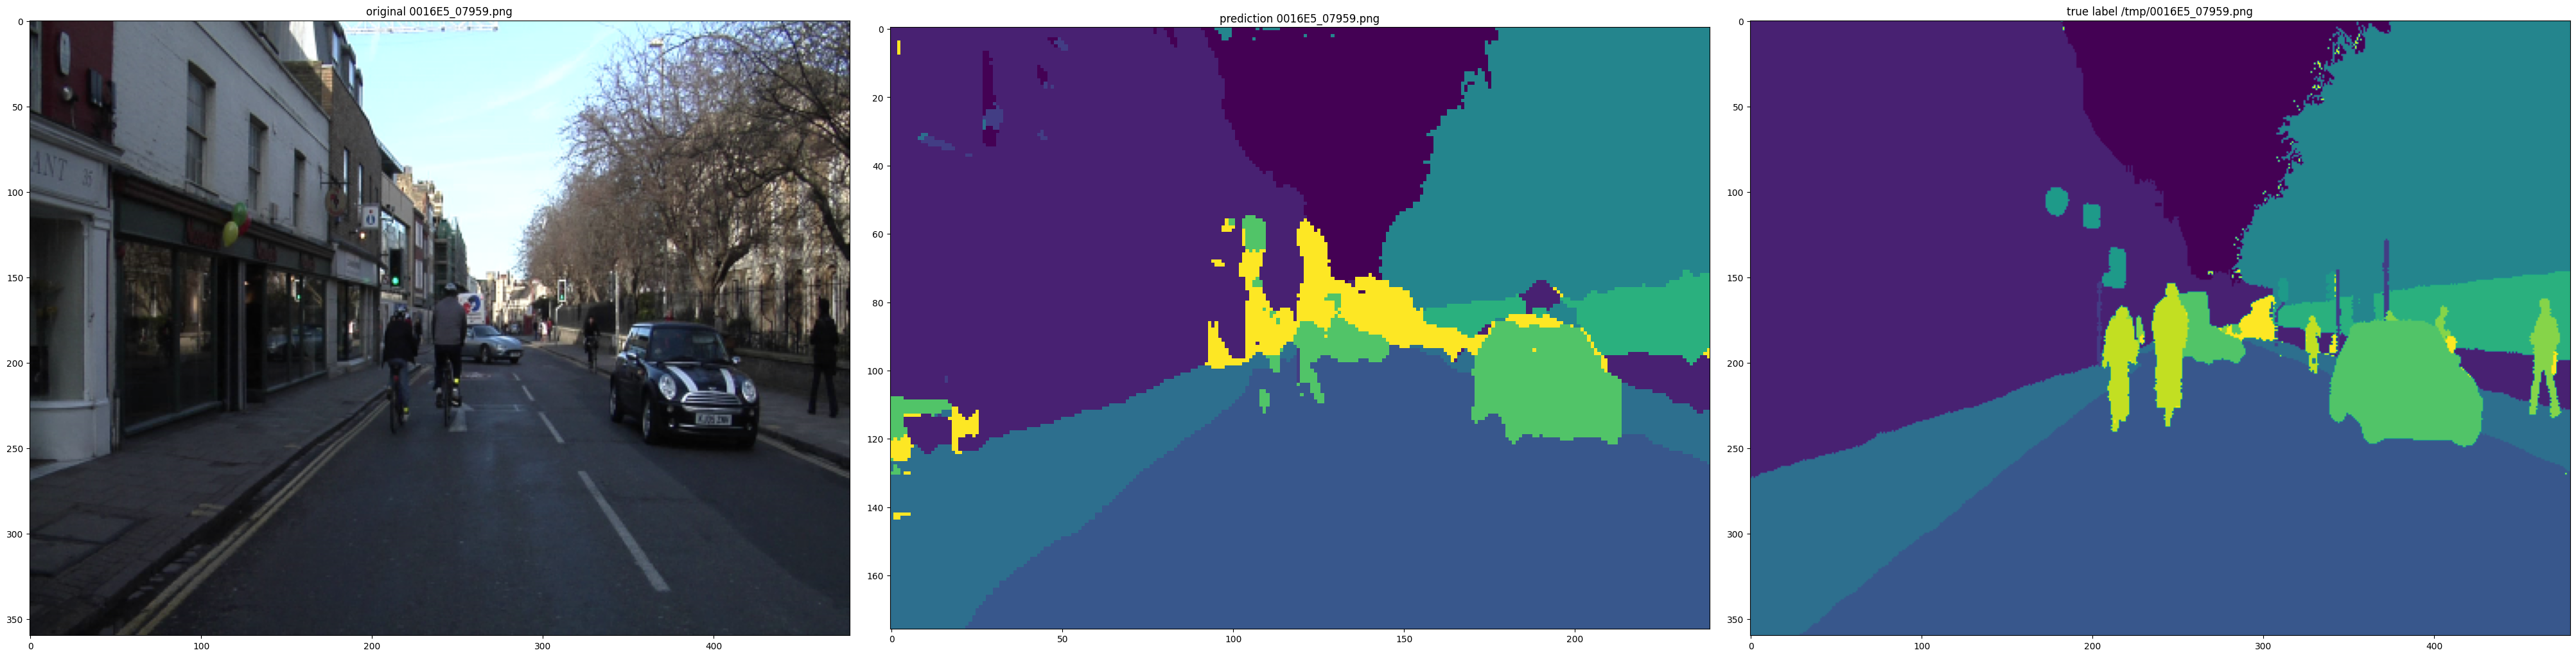

In [ ]:
show_sample_predictions(model_resnet_unet, test_img_path, test_annot_path, '0016E5_07959.png', '/tmp/0016E5_07959.png')

1/1 [==============================] - 0s 37ms/step


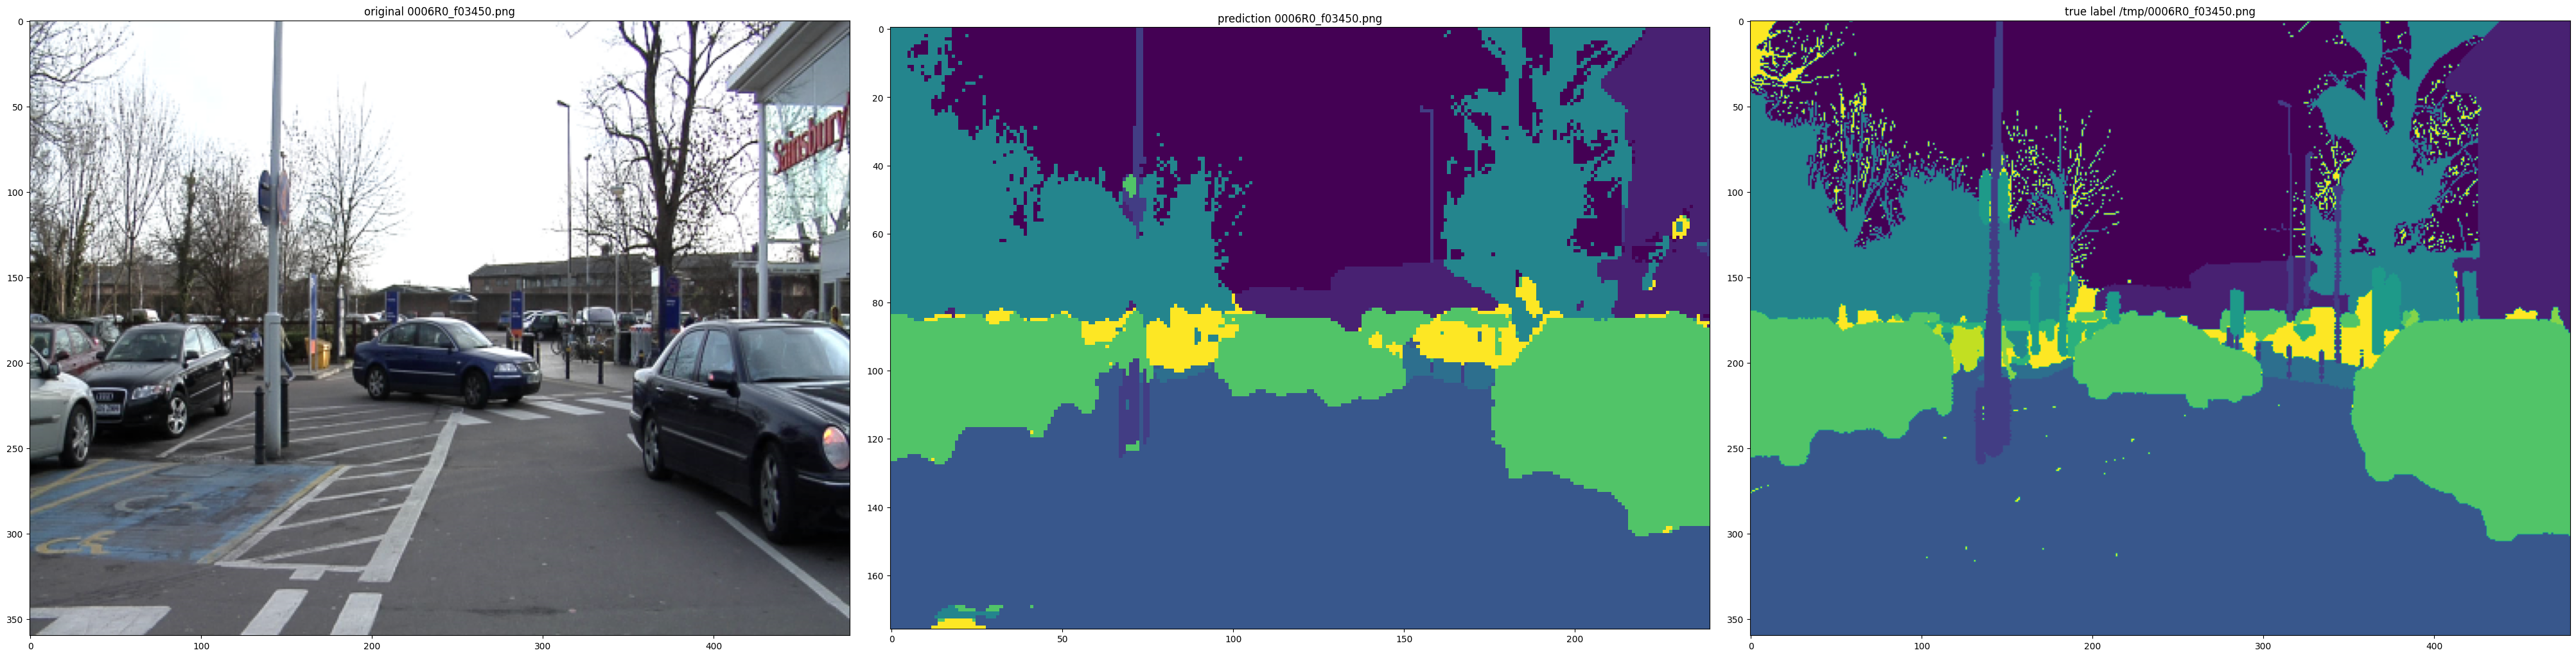

In [ ]:
show_sample_predictions(model_resnet_unet, train_img_path, train_annot_path, '0006R0_f03450.png', '/tmp/0006R0_f03450.png')

1/1 [==============================] - 0s 112ms/step


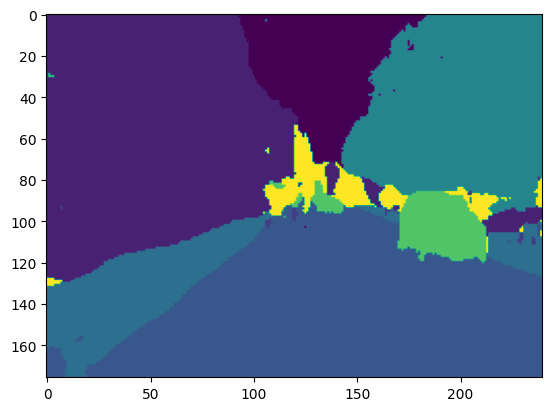

In [ ]:
out = model_resnet_unet.predict_segmentation(
    inp=os.path.join(test_img_path, "0016E5_07959.png"),
    out_fname="/tmp/out.png",
    overlay_img=True, show_legends=True,
    class_names=cityscapes_classes
)

plt.imshow(out)

In [ ]:
model_resnet_unet.evaluate_segmentation(
    inp_images_dir=train_img_path,
    annotations_dir=train_annot_path
)

In [ ]:
model_resnet_unet.evaluate_segmentation(
    inp_images_dir=test_img_path,
    annotations_dir=test_annot_path
)

In [ ]:
show_sample_predictions(model_resnet_unet, test_img_path, test_annot_path, '0016E5_07959.png', '/tmp/0016E5_07959.png')

In [ ]:
show_sample_predictions(model_resnet_unet, train_img_path, train_annot_path, '0001TP_007860.png', '/tmp/0001TP_007860.png')

## Video

reference code predict video: https://github.com/divamgupta/image-segmentation-keras/blob/master/keras_segmentation/predict.py

In [ ]:
from keras_segmentation.predict import predict

In [ ]:
def set_video(inp, video_name):
    cap = cv2.VideoCapture(inp)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    video_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    video_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    size = (video_width, video_height)
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    video = cv2.VideoWriter(video_name, fourcc, fps, size)
    return cap, video, fps

In [ ]:
def get_colored_segmentation_image(seg_arr, n_classes, colors=class_colors):
    output_height = seg_arr.shape[0]
    output_width = seg_arr.shape[1]

    seg_img = np.zeros((output_height, output_width, 3))

    for c in range(n_classes):
        seg_arr_c = seg_arr[:, :] == c
        seg_img[:, :, 0] += ((seg_arr_c)*(colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg_arr_c)*(colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg_arr_c)*(colors[c][2])).astype('uint8')

    return seg_img

In [ ]:
def overlay_seg_image(inp_img, seg_img):
    orininal_h = inp_img.shape[0]
    orininal_w = inp_img.shape[1]
    seg_img = cv2.resize(seg_img, (orininal_w, orininal_h), interpolation=cv2.INTER_NEAREST)

    fused_img = (inp_img/2 + seg_img/2).astype('uint8')
    return fused_img

In [ ]:
def get_legends(class_names, colors=class_colors):

    n_classes = len(class_names)
    legend = np.zeros(((len(class_names) * 25) + 25, 125, 3),
                      dtype="uint8") + 255

    class_names_colors = enumerate(zip(class_names[:n_classes],
                                       colors[:n_classes]))

    for (i, (class_name, color)) in class_names_colors:
        color = [int(c) for c in color]
        cv2.putText(legend, class_name, (5, (i * 25) + 17),
                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0), 1)
        cv2.rectangle(legend, (100, (i * 25)), (125, (i * 25) + 25),
                      tuple(color), -1)

    return legend

In [ ]:
def concat_lenends(seg_img, legend_img):

    new_h = np.maximum(seg_img.shape[0], legend_img.shape[0])
    new_w = seg_img.shape[1] + legend_img.shape[1]

    out_img = np.zeros((new_h, new_w, 3)).astype('uint8') + legend_img[0, 0, 0]

    out_img[:legend_img.shape[0], :  legend_img.shape[1]] = np.copy(legend_img)
    out_img[:seg_img.shape[0], legend_img.shape[1]:] = np.copy(seg_img)

    return out_img

In [ ]:
def visualize_segmentation(seg_arr, inp_img=None, n_classes=None,
                           colors=class_colors, class_names=None,
                           overlay_img=False, show_legends=False,
                           prediction_width=None, prediction_height=None):

    if n_classes is None:
        n_classes = np.max(seg_arr)

    seg_img = get_colored_segmentation_image(seg_arr, n_classes, colors=colors)

    if inp_img is not None:
        original_h = inp_img.shape[0]
        original_w = inp_img.shape[1]
        seg_img = cv2.resize(seg_img, (original_w, original_h), interpolation=cv2.INTER_NEAREST)

    if (prediction_height is not None) and (prediction_width is not None):
        seg_img = cv2.resize(seg_img, (prediction_width, prediction_height), interpolation=cv2.INTER_NEAREST)
        if inp_img is not None:
            inp_img = cv2.resize(inp_img,
                                 (prediction_width, prediction_height))

    if overlay_img:
        assert inp_img is not None
        seg_img = overlay_seg_image(inp_img, seg_img)

    if show_legends:
        assert class_names is not None
        legend_img = get_legends(class_names, colors=colors)

        seg_img = concat_lenends(seg_img, legend_img)

    return seg_img

In [ ]:
def predict_video(model=None, inp=None, output=None,
                  checkpoints_path=None, display=False, overlay_img=True,
                  class_names=None, show_legends=False, colors=class_colors,
                  prediction_width=None, prediction_height=None):

    n_classes = model.n_classes

    cap, video, fps = set_video(inp, output)
    while(cap.isOpened()):
        prev_time = time()
        ret, frame = cap.read()
        if frame is not None:
            pr = predict(model=model, inp=frame)
            fused_img = visualize_segmentation(
                pr, frame, n_classes=n_classes,
                colors=colors,
                overlay_img=overlay_img,
                show_legends=show_legends,
                class_names=class_names,
                prediction_width=prediction_width,
                prediction_height=prediction_height
                )
        else:
            break
        print("FPS: {}".format(1/(time() - prev_time)))
        if output is not None:
            video.write(fused_img)
        if display:
            cv2.imshow('Frame masked', fused_img)
            if cv2.waitKey(fps) & 0xFF == ord('q'):
                break
    cap.release()
    if output is not None:
        video.release()
    cv2.destroyAllWindows()

In [ ]:
predict_video(model_resnet_unet,
              inp='/content/traffic2.mp4',
              output='/content/traffic_output2.mp4')

1/1 [==============================] - 0s 25ms/step
FPS: 7.768725828678115
1/1 [==============================] - 0s 23ms/step
FPS: 7.078767094388534
1/1 [==============================] - 0s 22ms/step
FPS: 8.90987109876197
1/1 [==============================] - 0s 22ms/step
FPS: 8.730276084856962
1/1 [==============================] - 0s 23ms/step
FPS: 6.418854208911369
1/1 [==============================] - 0s 24ms/step
FPS: 6.840304970033025
1/1 [==============================] - 0s 24ms/step
FPS: 8.712884121223704
1/1 [==============================] - 0s 23ms/step
FPS: 8.712847922591314
1/1 [==============================] - 0s 25ms/step
FPS: 6.895634232353207
1/1 [==============================] - 0s 22ms/step
FPS: 8.929674859060174
1/1 [==============================] - 0s 23ms/step
FPS: 6.761636539208685
1/1 [==============================] - 0s 24ms/step
FPS: 7.135148008716702
1/1 [==============================] - 0s 25ms/step
FPS: 6.990553270355136
1/1 [=====================

1/1 [==============================] - 0s 85ms/step


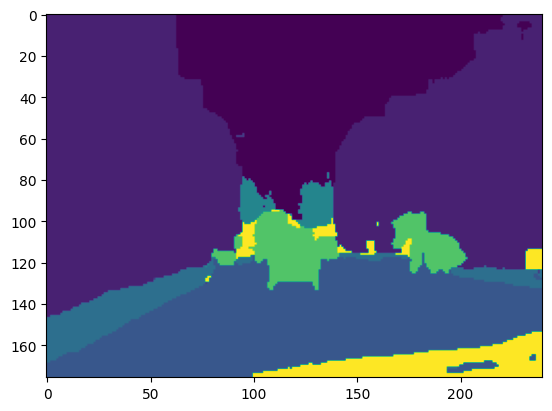

In [ ]:
out = model_resnet_unet.predict_segmentation(
    inp=os.path.join(train_img_path, "0001TP_007890.png"),
    out_fname="/tmp/out3.png",
    overlay_img=True, show_legends=True,
    class_names=cityscapes_classes,
    colors=class_colors
)

plt.imshow(out)